# Load Necessary Libraries

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import pickle

import warnings
warnings.filterwarnings('ignore')

# Load Test Data

In [44]:
# reading csv file and extracting class column to y. 

data = pd.read_csv("E:\\SUBRATA\MITL\\Journal\\MST\\Dataset 2\\Cluster_Patch\\Code and Data\\MultiClass_Test_Data.csv", sep=',',encoding="utf-8",error_bad_lines=False,low_memory = False) 

df = data.iloc[:,1:]
label = data['test_label']

# Split Binary Class Test Data Into 5 Parts

In [33]:
grouped = data.groupby(data.test_label)

grade3_test = grouped.get_group(0)
grade5_test = grouped.get_group(1)

grade3_test_label = grade3_test['test_label']
grade5_test_label = grade5_test['test_label']

In [34]:
grade3_test = grade3_test.drop(['test_label'], axis=1)
grade3_test_split = np.array_split(grade3_test, 5)

grade5_test = grade5_test.drop(['test_label'], axis=1)
grade5_test_split = np.array_split(grade5_test, 5)

grade3_test_split_label = np.array_split(grade3_test_label, 5)

grade5_test_split_label = np.array_split(grade5_test_label, 5)

In [35]:
#test_split
test_split_1 = pd.concat([grade3_test_split[0], grade5_test_split[0]])
test_split_2 = pd.concat([grade3_test_split[1], grade5_test_split[1]])
test_split_3 = pd.concat([grade3_test_split[2], grade5_test_split[2]])
test_split_4 = pd.concat([grade3_test_split[3], grade5_test_split[3]])
test_split_5 = pd.concat([grade3_test_split[4], grade5_test_split[4]])

#test_split_label
test_split_label_1 = pd.concat([grade3_test_split_label[0], grade5_test_split_label[0]])
test_split_label_2 = pd.concat([grade3_test_split_label[1], grade5_test_split_label[1]])
test_split_label_3 = pd.concat([grade3_test_split_label[2], grade5_test_split_label[2]])
test_split_label_4 = pd.concat([grade3_test_split_label[3], grade5_test_split_label[3]])
test_split_label_5 = pd.concat([grade3_test_split_label[4], grade5_test_split_label[4]])

# Split Multi-Class Test Data Into 5 Parts

In [5]:
grouped = data.groupby(data.test_label)

grade3_test = grouped.get_group(0)
grade4_test = grouped.get_group(1)
grade5_test = grouped.get_group(2)

grade3_test_label = grade3_test['test_label']
grade4_test_label = grade4_test['test_label']
grade5_test_label = grade5_test['test_label']


In [6]:
grade3_test = grade3_test.drop(['test_label'], axis=1)
grade3_test_split = np.array_split(grade3_test, 5)

grade4_test = grade4_test.drop(['test_label'], axis=1)
grade4_test_split = np.array_split(grade4_test, 5)

grade5_test = grade5_test.drop(['test_label'], axis=1)
grade5_test_split = np.array_split(grade5_test, 5)


grade3_test_split_label = np.array_split(grade3_test_label, 5)

grade4_test_split_label = np.array_split(grade4_test_label, 5)

grade5_test_split_label = np.array_split(grade5_test_label, 5)


In [7]:
#test_split

test_split_1 = pd.concat([grade3_test_split[0], grade4_test_split[0], grade5_test_split[0]])
test_split_2 = pd.concat([grade3_test_split[1], grade4_test_split[1], grade5_test_split[1]])
test_split_3 = pd.concat([grade3_test_split[2], grade4_test_split[2], grade5_test_split[2]])
test_split_4 = pd.concat([grade3_test_split[3], grade4_test_split[3], grade5_test_split[3]])
test_split_5 = pd.concat([grade3_test_split[4], grade4_test_split[4], grade5_test_split[4]])

#test_split_label

test_split_label_1 = pd.concat([grade3_test_split_label[0], grade4_test_split_label[0], grade5_test_split_label[0]])
test_split_label_2 = pd.concat([grade3_test_split_label[1], grade4_test_split_label[1], grade5_test_split_label[1]])
test_split_label_3 = pd.concat([grade3_test_split_label[2], grade4_test_split_label[2], grade5_test_split_label[2]])
test_split_label_4 = pd.concat([grade3_test_split_label[3], grade4_test_split_label[3], grade5_test_split_label[3]])
test_split_label_5 = pd.concat([grade3_test_split_label[4], grade4_test_split_label[4], grade5_test_split_label[4]])

# Load The Pretrained Models

In [27]:
Binary_Classifier = 'Stak_Classifier_Grade3_VS_Grade5.sav'

Binary_Classifier = pickle.load(open(Binary_Classifier, 'rb'))

Multiclass_Classifier = 'Stak_Classifier_Grade3_VS_Grade4_VS_Grade5.sav'

Multiclass_Classifier = pickle.load(open(Multiclass_Classifier, 'rb'))

# Predict Test Data

In [36]:
y_pred = Binary_Classifier.predict(df) ## whole test_test
y_pred1 = Binary_Classifier.predict(test_split_1)
y_pred2 = Binary_Classifier.predict(test_split_2)
y_pred3 = Binary_Classifier.predict(test_split_3)
y_pred4 = Binary_Classifier.predict(test_split_4)
y_pred5 = Binary_Classifier.predict(test_split_5)

# Result of Classification

In [28]:
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_label, test_pred)*100))

print(classification_report(test_label, test_pred)) #target_names=target
print(confusion_matrix(test_label, test_pred))

# Calculate Area Under ROC Curve

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import matplotlib.font_manager as font_manager

In [46]:
## ROC for Whole Test Set

pred_prob = Multiclass_Classifier.predict_proba(df)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

number_of_class = 3

for i in range(number_of_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(label, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(number_of_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(number_of_class):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= number_of_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC Curve

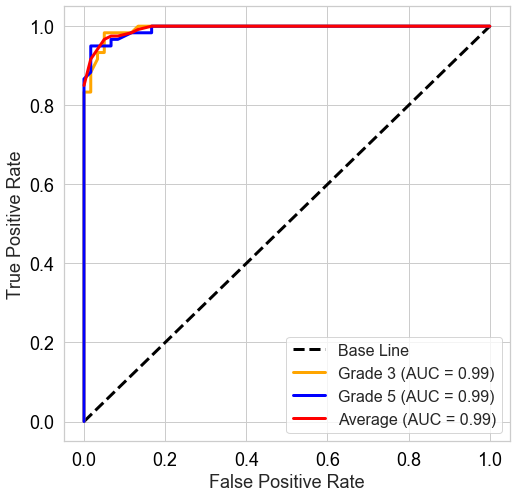

In [43]:
###Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'18'}

fig = pyplot.figure(figsize=(8, 8))

pyplot.plot([0, 1], [0, 1], linestyle='--', color='black', label ='Base Line', linewidth=3)
plt.plot(fpr[0], tpr[0], color='orange', label='Grade 3 (AUC = %0.2f)' % (roc_auc[0]), linewidth=3)
plt.plot(fpr[1], tpr[1], color='blue', label='Grade 5 (AUC = %0.2f)' % (roc_auc[1]), linewidth=3)
# plt.plot(fpr[2], tpr[2], color='green', label='Grade 5 (AUC = %0.2f)' % (roc_auc[2]), linewidth=3)
plt.plot(fpr["macro"], tpr["macro"], color='red', label='Average (AUC = %0.2f)' % (roc_auc["macro"]), linewidth=3)

# axis labels
pyplot.xlabel('False Positive Rate',**axis_font)
pyplot.ylabel('True Positive Rate', **axis_font)
# show the legend
pyplot.tick_params(labelsize=18, labelcolor= "black")
pyplot.legend(loc="best",prop={"size":16})
# show the plot
pyplot.show()

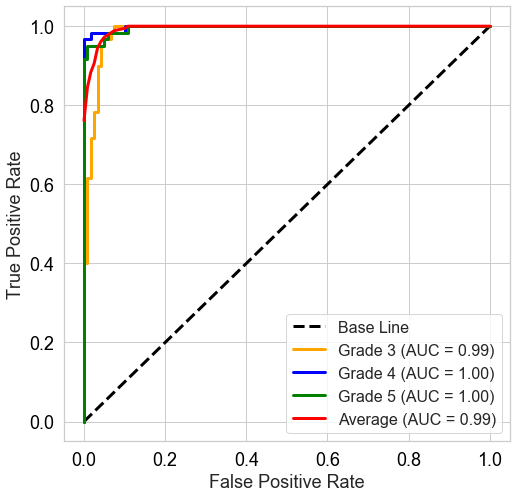